<div align="center">
    <h3>Universidad Tecnológica de Panamá <br/>Campus Victor Levi Sasso<br/>Facultad de Ingeniería en Sistemas Computacionales<br/>Licenciatura en Ingeniería en Sistemas y Computación<br/>Tópicos Especiales I - Visión Artificial</h3>
    <h3>Laboratorio Nº 2 - Detección y Extracción de Características</h3>
</div>

**Asignatura:** Tópicos Especiales - Visión Artificial 

**Código:** 0756

**Profesor:** Edmanuel Cruz

**Estudiante:** Ricardo Cuan 8-941-913

## Objetivos

Extraer puntos claves y descriptores de diferentes im´agenes utilizando OpenCV y el lenguaje
Python.

<div align="center">
    <h1>Introducción</h1>
</div>

En este laboratorio se mostrarán lo diferentes algoritmos disponibles en OpenCV para la
detección de puntos clave dentro de las imágenes. Se abordaran los detectores de esquinas
y regiones en diferentes imágenes. De igual manera se presenta al estudiante la manera de
generar descriptores para puntos clave de las imágenes.

Dentro del contenido se emplear´an de igual manera las librerías Numpy y MatPlotLib,
las cuales seguir´an siendo utilizadas a los largo del semestre.

<div align="center">
    <h1>Resultados</h1>
</div>

# 1. Detectores de Keypoints

## 1.1. Detector de Esquinas Harris

En una imagen las esquinas son regiones que presentan grandes cambios en la intensidad
en todas las direcciones. El detector de Harris fue un intento temprano para encontrar estas
esquinas dentro de las imágenes. Fue presentado en el articulo A Combined Corner and Edge
Detector [1] en 1988.
Los autores tomaron la características de variación de la intensidad y la llevaron a un
forma matemática. Ellos básicamente la diferencia de intensidad para un desplazamiento
(u, v) en todas las direcciones.

1. Como primer paso crea su script/notebook y añade las importaciones a OpenCV,
Numpy(np) y Pyplot(plt) de Matplotlib.

2. En el siguiente código cargamos nuestra imagen y se convierte a escala de grises, tal
cual lo pide la función.

In [1]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt 

imgHarris = cv2.imread('img/scrabble.jpg')

#Convertir a escala de grises
gray = cv2.cvtColor(imgHarris, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

3. El siguiente paso es la definición de los parámetros y la aplicación del método de Harris.
El algoritmos produce como salida una imagen de igual tamaño a la imagen de entrada
y en la cual se almacena las respuestas de los detectores de Harris. En esta porción de
código esta imagen recibe un proceso de dilatado1 para facilitar la visualización de los
resultados.

In [2]:
blockSize = 2
ksize = 3
k = 0.08
dst = cv2.cornerHarris(gray,blockSize,ksize,k)

#print(dst)
# Se dilata el resultado para marcar las esquinas, no importante
# se hacen mÁs visibles en al visualizar la imagen
dst = cv2.dilate(dst,None)

4. El resto del código se encarga de pintar los puntos detectados en la imagen original,
mostrar y guardar la imagen con los puntos identificados.

Puntos Totales Usando Harris : 4793658


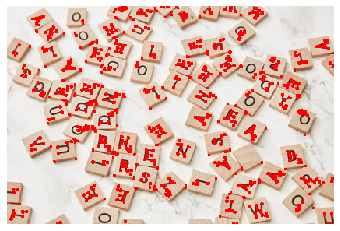

In [3]:
# Umbral para un valor Óptimo, puede variar segÚn la imagen
puntos = imgHarris[dst>0.01*dst.max()].sum()
print( "Puntos Totales Usando Harris : {}".format(puntos) )

imgHarris[dst > 0.01*dst.max()] = [0,0,255]
cv2.imshow('dst', imgHarris)
cv2.waitKey(0)

# Para destruir todas las ventanas creadas
cv2.destroyAllWindows()
cv2.imwrite("out/Harris.png", imgHarris)

plt.imshow(imgHarris[:, :, ::-1] )
plt.axis('off')
plt.show()

## 1.2. Detector de Esquinas Shi-Tomasi

1. Como primer paso crea un script/notebook y añade las importaciones a OpenCV,
Numpy(np) y Pyplot(plt) de Matplotlib.


2. En el siguiente código cargamos nuestra imagen y se convierte a escala de grises, tal
cual lo pide la función, se definen los parámetros y se aplica el método a la imagen de
entrada.

In [4]:
imgShi = cv2.imread('img/tower.jpg')
gray = cv2.cvtColor(imgShi,cv2.COLOR_BGR2GRAY)

# Cantidad Deseada
cantidad = 65

# Calidad [0-1]
qlt = 0.08

# Distancia Euclidea m´ınima entre puntos
euDist = 10
corners = cv2.goodFeaturesToTrack(gray,cantidad,qlt,euDist)
corners = np.int0(corners)
print( "Keypoints Totales Usando Shi-imgTomasi : {}".format(len(corners)) )

Keypoints Totales Usando Shi-imgTomasi : 65


3. La siguiente fracción de código establece la configuración para vizualizar las equinas
detectadas en la imagen de entrada y guardar la imagen en disco.

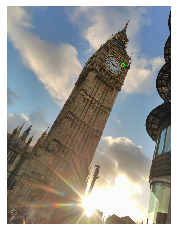

In [5]:
# Radio del circulo
radio = 8
# color en BGR
color = (0, 255, 0)

# grosor de la linea
thickness = 2
for i in corners:
    x,y = i.ravel()

cv2.circle(imgShi,(x,y),radio, color, thickness)
plt.imshow(imgShi[:, :, ::-1] )
plt.savefig("out/Tomasi.png", dpi=600, orientation='portrait', transparent=True)
plt.axis('off')
plt.show()

## 1.3. Detector MSER

1. Como primer paso crea un script/notebook y añade las importaciones a OpenCV,
Numpy(np) y Pyplot(plt) de Matplotlib.

2. En el siguiente código cargamos nuestra imagen y se convierte a escala de grises, se crea
la instancia del método y se aplica el mismo. Este, devuelve un conjunto de coordenadas
y bounding boxes de las regiones identificadas dentro de la imagen.

In [6]:
# Leer la imagen y cambiar el espacio de color
imgname = 'img/mariposa.jpg'
imgMSER = cv2.imread(imgname)
grayMSER = cv2.cvtColor(imgMSER, cv2.COLOR_BGR2GRAY)

# Inicializar MSER y asignar parámetros
mser = cv2.MSER_create()

# Realizar la detección, obteniendo las coordenadas
# de las regiones y sus bounding boxes
coordinates, bboxes = mser.detectRegions(grayMSER)


3. El siguiente fragmento analiza los resultados del método y según el tamaño de las
regiones selecciona algunas de las detectadas, de igual manera se define un arreglo con
valor BGR de colores para pintar las regiones de colores diferentes en forma aleatoria.
En este caso se estarán generando 3 imágenes (canva#) en la cual veremos las regiones
identificadas. La imagen original, una en escala de grises y una máscara de las regiones
detectadas.

In [7]:
coords = []
for coord, bbox in zip(coordinates, bboxes):
    x,y,w,h = bbox
    if w< 10 or h < 10 or w/h > 5 or h/w > 5:
        continue
    coords.append(coord)
print( "Regiones Detectadas usando MSER Detector : {}".format(len(coordinates)))
    
# lista de colores para asignar a las regiones
colors = [[43, 43, 200], [43, 75, 200], [43, 106, 200], [43, 137, 200],
          [43, 169, 200], [43, 200, 195], [43, 200, 163], [43, 200, 132],
          [43, 200, 101], [43, 200, 69], [54, 200, 43], [85, 200, 43],
          [116, 200, 43], [148, 200, 43], [179, 200, 43], [200, 184, 43],
          [200, 153, 43], [200, 122, 43], [200, 90, 43], [200, 59, 43],
          [200, 43, 64], [200, 43, 95], [200, 43, 127], [200, 43, 158],
          [200, 43, 190], [174, 43, 200], [142, 43, 200], [111, 43, 200],
          [80, 43, 200], [43, 43, 200]]

# Pintar las regiones con colores aleatorios
np.random.seed(0)
canvas1 = imgMSER.copy()
canvas2 = cv2.cvtColor(grayMSER, cv2.COLOR_GRAY2BGR)
canvas3 = np.zeros_like(imgMSER)

Regiones Detectadas usando MSER Detector : 357



4. El siguiente fragmento de código dibuja en cada uno de los canva# creado las regiones,
utilizando un color aleatorio. Se guarda la imagen y se muestra el resultado en pantalla.

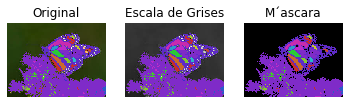

In [8]:
for cnt in coords:
    xx = cnt[:,0]
    yy = cnt[:,1]
    color = colors[np.random.choice(len(colors))]
    canvas1[yy, xx] = color
    canvas2[yy, xx] = color
    canvas3[yy, xx] = color

cv2.imwrite("out/result1_mser.png", canvas1)
cv2.imwrite("out/result2_mser.png", canvas2)
cv2.imwrite("out/result3_mser.png", canvas3)

plt.subplot(131)
plt.imshow(canvas1[:, :, ::-1])
plt.title('Original')
plt.axis('off')

plt.subplot(132)
plt.imshow(canvas2[:, :, ::-1])
plt.title('Escala de Grises')
plt.axis('off')

plt.subplot(133)
plt.imshow(canvas3[:, :, ::-1])
plt.title('M´ascara')
plt.axis('off')

plt.savefig("out/MSER_Result.png", dpi=600, transparent=True)
plt.show()


## 1.4. Detector FAST

1. Como primer paso crea un script/notebook y añade las importaciones a OpenCV,
Numpy(np) y Pyplot(plt) de Matplotlib.

2. FAST puede recibir un conjunto de parámetros, los cuales están definidos de forma
predeterminada por el algoritmo y estos suelen funcionar de manera adecuada en la
mayoría de los casos. Uno de los parámetros que es modificado de manera general es el
threshold.

3. En nuestro ejemplo se modifica también la opción de supresión de máximos para evitar
redundancia de puntos.

4. El siguiente código aplica el detector FAST a una imagen y produce 2 salidas, con y
sin supresión de máximos. Estas son almcenadas en disco.

Threshold: 15
nonmaxSuppression:True
vecindario: 2
Keypoints Totales con nonmaxSuppression: 3865
Keypoints Totales sin nonmaxSuppression: 11928


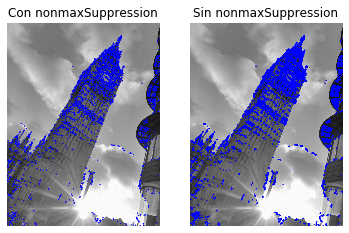

In [9]:
imgFast = cv2.imread('img/tower.jpg',0)
# Inicializar FAST con los valores por defecto, salvo el threshold
# Threshold

thre = 15
fast = cv2.FastFeatureDetector_create(thre)

# encontrar y dibujar los keypoints
kp = fast.detect(imgFast,None)
imgFast2 = cv2.drawKeypoints(imgFast, kp, None, color=(255,0,0))

# Imprimir los par´ametros utilizados
print( "Threshold: {}".format(fast.getThreshold()) )
print( "nonmaxSuppression:{}".format(fast.getNonmaxSuppression()) )
print( "vecindario: {}".format(fast.getType()) )
print( "Keypoints Totales con nonmaxSuppression: {}".format(len(kp)) )
cv2.imwrite('out/fast_true.png',imgFast2)

# Desactivar nonmaxSuppression
fast.setNonmaxSuppression(0)
kp = fast.detect(imgFast,None)
print( "Keypoints Totales sin nonmaxSuppression: {}".format(len(kp)) )
imgFast3 = cv2.drawKeypoints(imgFast, kp, None, color=(255,0,0))

cv2.imwrite('out/fast_false.png',imgFast3)
plt.subplot(121)
plt.imshow(imgFast2[:, :, ::-1])

plt.title('Con nonmaxSuppression')
plt.axis('off')
plt.subplot(122)
plt.imshow(imgFast3[:, :, ::-1])

plt.title('Sin nonmaxSuppression')
plt.axis('off')
plt.show()


## 1.5. Detector ORB

1. Como primer paso crea un script/notebook y añade las importaciones a OpenCV,
Numpy(np) y Pyplot(plt) de Matplotlib.

2. El siguiente código aplica el detector ORB a una imagen de entrada y almacena en
disco una imagen donde marca los keypoints detectados.

Keypoints Totales Usando ORB Detector : 500


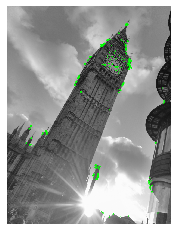

In [10]:
imgORB = cv2.imread('img/tower.jpg',0)
# Inicializar el Detector ORB
orb = cv2.ORB_create(nfeatures = 500)
# Encontrar los Keypoints
kp = orb.detect(imgORB,None)
# Pintar los Keypoints en la imagen original
imgORB2 = cv2.drawKeypoints(imgORB, kp, None, color=(0,255,0), flags=0)
print( "Keypoints Totales Usando ORB Detector : {}".format(len(kp)) )
plt.imshow(imgORB2[:, :, ::-1] )
plt.axis('off')
plt.savefig("out/ORB_KP.png", dpi=600, orientation='portrait', transparent=True)
plt.show()


Entregables para la Sección

Para esta sección en su informe debe incluir la modificación de una imagen de su propiedad. En dicha imagen se deben realizar las siguientes operaciones:

1. Seleccione una imagen para los detectores de Harris, Shi-Tomasi. Aplique a cada
imagen, cada uno de los detectores. Luego aplique un filtro bilateral a cada imagen
original. Posteriormente, aplique los detectores a la imagen filtrada, grafique los
resultados.

2. Seleccione una imagen para el detector MSER. Aplique el detector. Luego aplique
un filtro bilateral a la imagen original. Posteriormente, aplique el detector a la
imagen filtrada, grafique los resultados.

3. Se recomienda la misma imagen para Harris y Shi-Tomasi y una imagen distinta
para MSER.

4. Para los detectores FAST y ORB, seleccione una imagen (debe ser la misma
imagen para ambos detectores). Aplique los detectores, ajustando los parámetros
para que se produzca una buena identificación en la imagen. Luego, aplique a la
imagen original un giro de 90 utilizando la función:
ImageRot= cv2.rotate(ImageOrg, cv2.ROTATE_90_COUNTERCLOCKWISE)
La cual esta disponible en OpenCV. Seguidamente, aplique los algoritmos detectores utilizando los mismos parámetros que utilizó con las imágenes originales.

5. Presente gráficamente los resultados para cada detector señalando los puntos detectados antes y después de aplicar la modificación de la imagen original, se
recomienda utilizar subplots de matplotlib.

6. Al final para esta sección deberá presentar un total de 5 pares de imágenes de
antes y después para cada algoritmo detector presentado.


# 2. Descriptores

## 2.1. Descriptor ORB

1. Como primer paso crea un script/notebook y añade las importaciones a OpenCV,
Numpy(np) y Pyplot(plt) de Matplotlib.

2. El siguiente fragmento de código es una función que debemos declarar en nuestro script
y permitirá generar un conjunto de gráficos de barras que representan el descriptor
generado para algunas de los puntos clave identificados. Esta función se utilizará con
todo los descriptores presentados en esta sección del laboratorio.

In [11]:
def show_img_ply(bins, val, pos ):
    plt.subplot(3,4,pos)
    plt.bar(bins, val, width = 0.6, color='#0504aa',alpha=0.7)
    plt.xlim(min(bins), max(bins))

3. Agregue el siguiente código, en este se crea una instancia del Detector ORB y se utiliza
el método detectAndCompute() para detectar y describir los keypoints en un solo
paso. Con este método el algoritmo detecta de manera inmediata los puntos claves y
los describe. Es un método que se utiliza de igual manera para todo los algoritmos que
sean detectores y descriptores disponibles en OpenCV.

In [12]:
imgORB = cv2.imread('img/tower.jpg')

# Inicializar Detector ORB
orb = cv2.ORB_create(nfeatures = 2500, edgeThreshold = 73, nlevels=18)

# Calcular Keypoints y Descriptores con ORB
kpORB, desORB = orb.detectAndCompute(imgORB, None)

4. El siguiente fragmento de código utiliza la función show img ply() para mostrar un
histograma de los 12 primeros descriptores para la imagen en cuestión y guarda dicha
representación en disco. Si lo desea puede modificar los histogramas que se visualizan

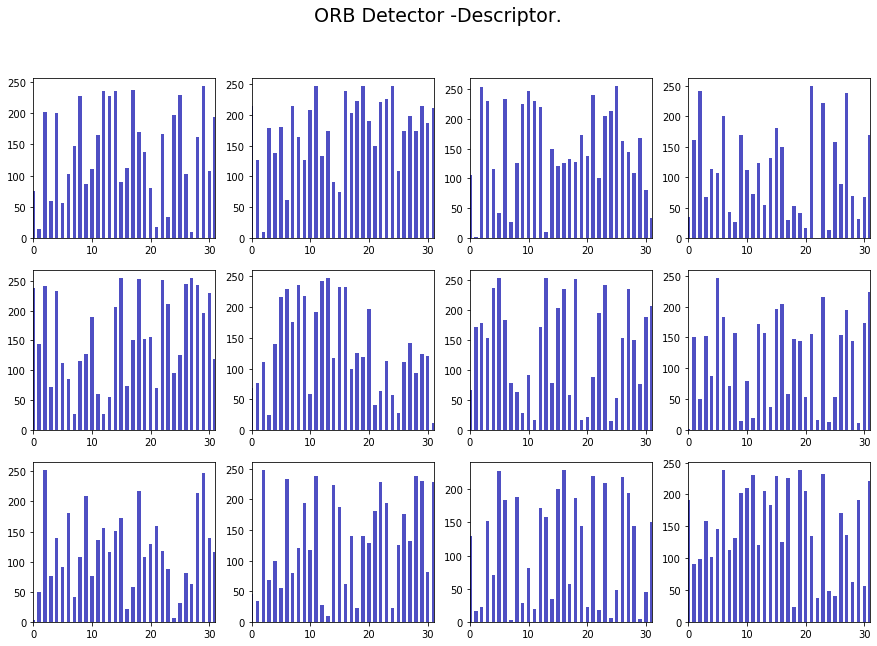

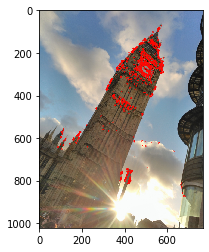

In [13]:
#Preparar Salida
bins = list(range(desORB.shape[1]))
fig, axs = plt.subplots(3,4, figsize=(15,10), sharex='col', sharey='row')
fig.suptitle("ORB Detector -Descriptor.",fontsize=19, va='top')

for i in range(12):
    val= desORB[i]
    pos = i+1
    show_img_ply(bins, val, pos )
    if(i == 11):
        plt.savefig("out/ORB_Det_Desc_Histograma.png", dpi=350, bbox_inches='tight')

plt.show()

# Dibujar los Keypoints
imgORB2 = cv2.drawKeypoints(imgORB,kpORB,np.array([]),
color=(0,5,255), flags=0)
cv2.imwrite("out/Tower_ORB.png", imgORB2)
plt.imshow(imgORB2[:, :, ::-1])
plt.show()

## 2.2. Descriptor BRISK

1. Como primer paso crea un script/notebook y añade las importaciones a OpenCV,
Numpy(np) y Pyplot(plt) de Matplotlib. Agregue también la función show img ply()
mostrada en el apartado anterior. De igual manera este código se puede colocar en el
mismo script/notebook utilizado en el ejemplo anterior.

2. Agregue el siguiente código, en este se crea una instancia del Detector BRISK y se
utiliza el método detectAndCompute() para detectar y describir los keypoints en un
solo paso. Con este método el algoritmo detecta de manera inmediata los puntos claves
y los describe. Es un método que se utiliza de igual manera para todo los algoritmos
que sean detectores y descriptores disponibles en OpenCV.

In [14]:
imgBrisk = cv2.imread('img/tower.jpg')


# Convertimos la imagen a escala de grises,
# puesto que es un prerrequisito para usar descriptores binarios.
grayBrisk = cv2.cvtColor(imgBrisk, cv2.COLOR_BGR2GRAY)


# Instanciamos BRISK, el cual nos da los puntos
# clave as´ı como los descriptores binarios.
detectorBrisk = cv2.BRISK_create()
keypointsBrisk, descriptorsBrisk = detectorBrisk.detectAndCompute(grayBrisk, None)


# Imprimimos el número de puntos clave hallados,
# así como las dimensiones del vector de features.
print(f'Número de puntos clave detectados.: {len(keypointsBrisk)}')
print(f'Dimensiones del vector de features: {descriptorsBrisk.shape}')

Número de puntos clave detectados.: 2335
Dimensiones del vector de features: (2335, 64)


3. El siguiente fragmento de código utiliza la función show img ply() para mostrar un
histograma de los 12 primeros descriptores para la imagen en cuestión y guarda dicha
representación en disco. Si lo desea puede modificar los histogramas que se visualizan.

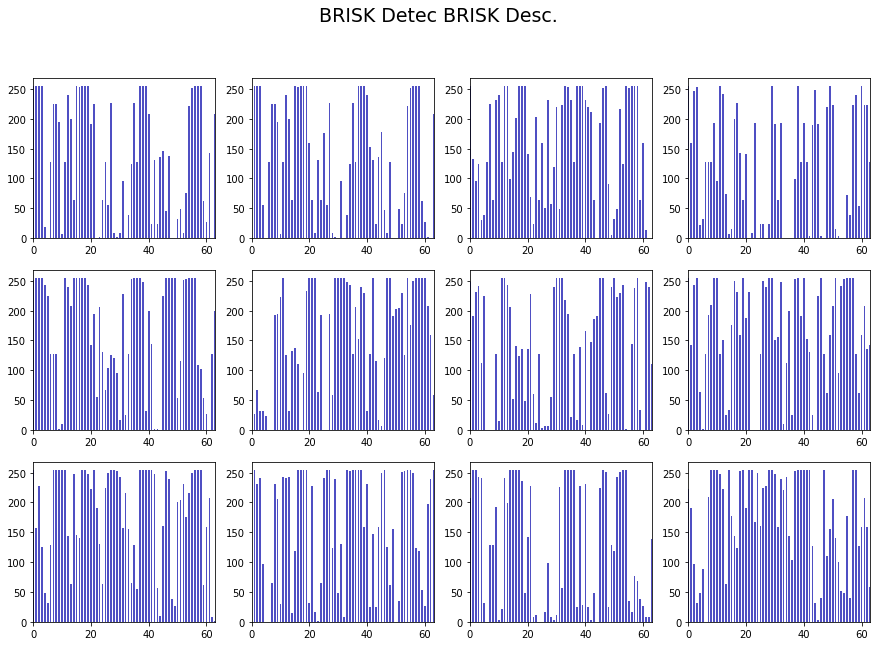

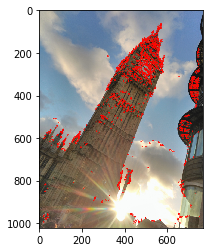

In [15]:
#Preparar Salida
bins = list(range(descriptorsBrisk.shape[1]))
fig, axs = plt.subplots(3,4, figsize=(15,10), sharex='col', sharey='row')
fig.suptitle("BRISK Detec BRISK Desc.",fontsize=19, va='top')
for i in range(12):
    val= descriptorsBrisk[i]
    pos = i+1
    show_img_ply(bins, val, pos )
    if(i == 11):
        plt.savefig("out/BRISK_Det_BRISK_Des_Histograma.png", dpi=350, bbox_inches='tight')

plt.show()

# Dibujar los Keypoints
imgBrisk2 = cv2.drawKeypoints(imgBrisk,keypointsBrisk,np.array([]),
color=(0,5,255), flags=0)
cv2.imwrite("out/Tower_BRISK.png", imgBrisk2)
plt.imshow(imgBrisk2[:, :, ::-1])
plt.show()


## 2.3. Descriptor KAZE

1. Como primer paso crea un script/notebook y añade las importaciones a OpenCV,
Numpy(np) y Pyplot(plt) de Matplotlib. Agregue también la función show img ply()
mostrada en el apartado anterior. De igual manera este código se puede colocar en el
mismo script/notebook utilizado en el ejemplo anterior.

2. Agregue el siguiente código, en este se crea una instancia del Detector KAZE y se
utiliza el método detectAndCompute() para detectar y describir los keypoints en un
solo paso. Con este método el algoritmo detecta de manera inmediata los puntos claves y los describe. Es un método que se utiliza de igual manera para todo los algoritmos
que sean detectores y descriptores disponibles en OpenCV.

In [16]:
# Cargamos una imagen de prueba y la mostramos en pantalla.
imgKaze = cv2.imread('img/tower.jpg')

# Convertimos la imagen a escala de grises,
# puesto que es un prerrequisito para usar descriptores binarios.
grayKaze = cv2.cvtColor(imgKaze, cv2.COLOR_BGR2GRAY)

# Instanciamos KAZE, el cual nos da los puntos
# clave as´ı como los descriptores binarios.
detectorKaze = cv2.KAZE_create()
keypointsKaze, descriptorsKaze = detectorKaze.detectAndCompute(grayKaze, None)

# Imprimimos el n´umero de puntos clave hallados,
# as´ı como las dimensiones del vector de features.
print(f'N´umero de puntos clave detectados.: {len(keypointsKaze)}')
print(f'Dimensiones del vector de features: {descriptorsKaze.shape}')

N´umero de puntos clave detectados.: 1018
Dimensiones del vector de features: (1018, 64)


3. El siguiente fragmento de código utiliza la función show img ply() para mostrar un
histograma de los 12 primeros descriptores para la imagen en cuestión y guarda dicha
representación en disco. Si lo desea puede modificar los histogramas que se visualizan.

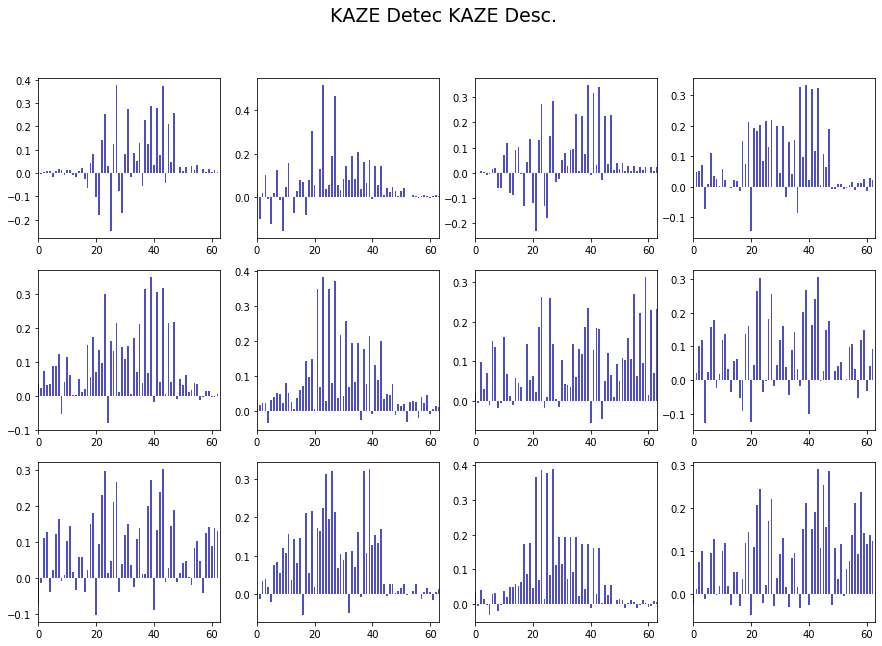

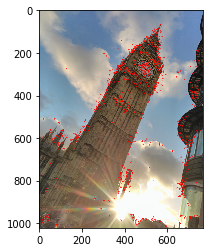

In [17]:
#Preparar Salida
bins = list(range(descriptorsKaze.shape[1]))
fig, axs = plt.subplots(3,4, figsize=(15,10), sharex='col', sharey='row')
fig.suptitle("KAZE Detec KAZE Desc.",fontsize=19, va='top')

for i in range(12):
    val= descriptorsKaze[i]
    pos = i+1
    show_img_ply(bins, val, pos )
    if(i == 11):
        plt.savefig("out/KAZE_Det_KAZE_Des_Histograma.png", dpi=350, bbox_inches='tight')

plt.show()

# Dibujar los Keypoints
imgKaze2 = cv2.drawKeypoints(imgKaze,keypointsKaze,np.array([]),
color=(0,5,255), flags=0)
cv2.imwrite("out/Tower_KAZE.png", imgKaze2)
plt.imshow(imgKaze2[:, :, ::-1])
plt.show()

## 2.4. Combinado Detectores y Descriptores

1. Como primer paso crea un script/notebook y añade las importaciones a OpenCV,
Numpy(np) y Pyplot(plt) de Matplotlib. Agregue también la función show img ply()
mostrada en el apartado anterior. De igual manera este código se puede colocar en el
mismo script/notebook utilizado en el ejemplo anterior.

2. Agregue el siguiente código, en este se crea una instancia del Detector FAST y otra
instancia del descriptor ORB. Se emplea el método detect() de FAST para encontrar
los keypoints y la salida de este se pasa al método compute() de ORB para describir
los keypoints. Este procedimiento es similar para la mayoría de las combinaciones de
detectores y descriptores de OpenCV.

In [18]:
imgFast = cv2.imread('img/tower.jpg',0)

# Threshold
thre = 15
fast = cv2.FastFeatureDetector_create(thre)

# encontrar y dibujar los keypoints
kpFAST = fast.detect(imgFast,None)

# Inicializar Detector ORB
orb = cv2.ORB_create()

# Calcular Descriptores con ORB
kpFAST, desORB = orb.compute(imgFast, kpFAST)


3. El siguiente fragmento de código utiliza la función show img ply() para mostrar un
histograma de los 12 primeros descriptores para la imagen en cuestión y guarda dicha
representación en disco. Si lo desea puede modificar los histogramas que se visualizan.

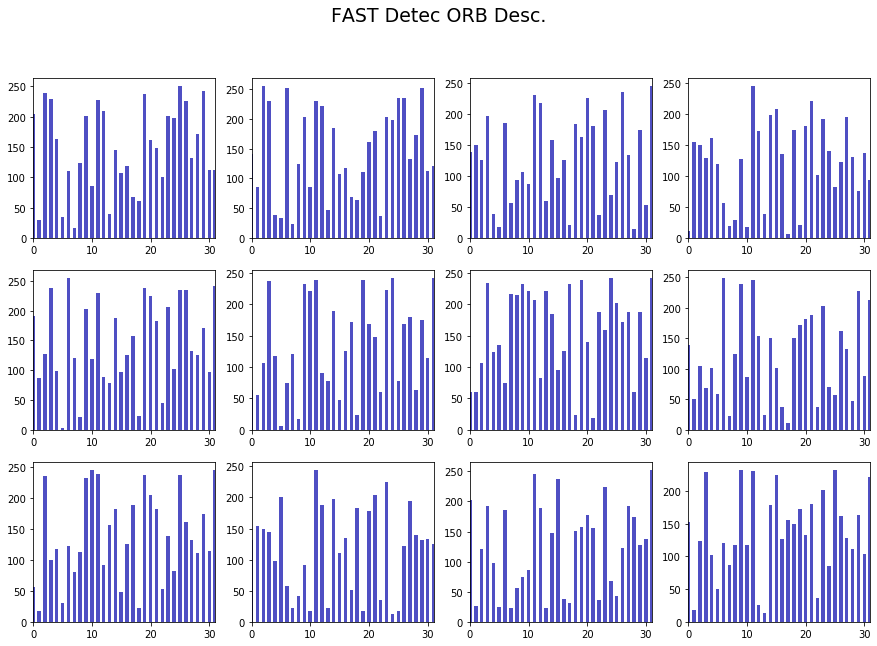

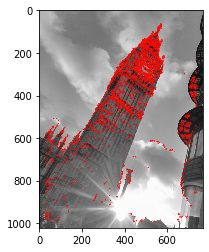

In [19]:
#Preparar Salida
bins = list(range(desORB.shape[1]))
fig, axs = plt.subplots(3,4, figsize=(15,10), sharex='col', sharey='row')
fig.suptitle("FAST Detec ORB Desc.",fontsize=19, va='top')

for i in range(12):
    val= desORB[i]
    pos = i+1
    show_img_ply(bins, val, pos )
    if(i == 11):
        plt.savefig("out/FAST_Det_ORB_Des_Histograma.png", dpi=350, bbox_inches='tight')

plt.show()

# Dibujar los Keypoints
imgFAST2 = cv2.drawKeypoints(imgFast,kpFAST,np.array([]),
color=(0,5,255), flags=0)
cv2.imwrite("out/Tower_FAST.png", imgFAST2)
plt.imshow(imgFAST2[:, :, ::-1])
plt.show()


4. Lo cual producirá el siguiente resultado:


Entregables para la Sección

Para esta sección en su informe debe incluir la modificación de una imagen de su propiedad. En dicha imagen se deben realizar las siguientes operaciones:

1. Seleccione una imagen de su propiedad, extraiga los keypoints utilizando el algoritmo FAST y describa estos puntos claves con el descriptor BRISK. Presente
los histogramas para los 16 primeros keypoints utilizando matplotlib. Muestre
también los keypoints detectados en la imagen original.

2. Al final de esta sección tendrá 1 par de imágenes donde una representa la imagen
con los keypoints identificados y la otra una figura con los 16 histogramas de
descriptores para la misma imagen.

# 3. Transformada de Hough

## 3.1. Detectar Líneas

1. Como primer paso crea un script/notebook y añade las importaciones a OpenCV,
Numpy(np) y Pyplot(plt) de Matplotlib.

2. En este caso se aplicará la la transformada de Hough para detectar líneas en una imagen.


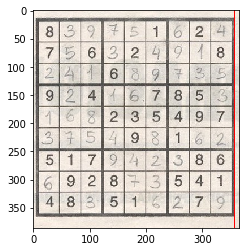

In [20]:
img1 = cv2.imread('img/sudo.jpg')

gray1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
edges1 = cv2.Canny(gray1,50,150,apertureSize = 3)

lines1 = cv2.HoughLines(edges1,1,np.pi/180,200)

for rho,theta in lines1[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img1,(x1,y1),(x2,y2),(0,0,255),2)

cv2.imwrite('out/houghlines1.jpg', img1)
plt.imshow(img1[:, :, ::-1])


## 3.2. Transformada Probabilística de Hough


1. Como primer paso crea un script/notebook y añade las importaciones a OpenCV,
Numpy(np) y Pyplot(plt) de Matplotlib.


2. Agregue el siguiente código

[[  0   6 139   6]]


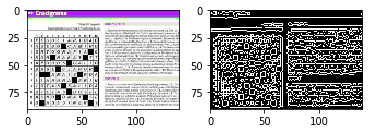

In [21]:
img3 = cv2.imread('img/cruci1.jpg')
h,w,c = img3.shape

# Nuevo Tama~no

dsize = (int(w*0.250), int(h*0.250))
# resize image
img4 = cv2.resize(img3, dsize)
gray4 = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)
edges4 = cv2.Canny(gray4, 50, 150, apertureSize = 3)
lines4 = cv2.HoughLinesP(edges4, 1, np.pi/180, 100, minLineLength=100, maxLineGap=10)

print(lines4[0])

for line in lines4:
    x1, y1, x2, y2 = line[0]
    cv2.line(img4, (x1,y1), (x2,y2), (0,255,0), 1, cv2.LINE_AA)

cv2.imwrite("out/lineasHough4.png", img4)
plt.subplot(121)

plt.imshow(img4[:, :, ::-1])
plt.subplot(122)

plt.imshow(edges4,cmap = 'gray')
plt.savefig("out/LineasHough_Comparativa.png", dpi=600)
plt.show()

## 3.3. Detectar Círculos

1. Como primer paso crea un script/notebook y añade las importaciones a OpenCV,
Numpy(np) y Pyplot(plt) de Matplotlib.

2. Seguidamente copiamos el siguiente código que implementa Hough, muestra y almacena
el resultado en disco.

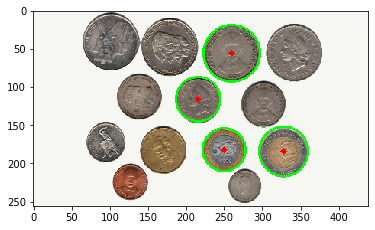

In [22]:
imgIn = cv2.imread('img/coin.jpg')
h,w,c = imgIn.shape

# Nuevo Tama~no
dsize = (int(w*0.250), int(h*0.250))

# resize image
imgCir = cv2.resize(imgIn, dsize)

src = cv2.medianBlur(imgCir, 5)
src = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

circles = cv2.HoughCircles(src, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=80, minRadius=0, maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
    # dibujar circulo
    cv2.circle(imgCir, (i[0], i[1]), i[2], (0,255,0), 2)
    # dibujar centro
    cv2.circle(imgCir, (i[0], i[1]), 2, (0,0,255), 3)
    
cv2.imwrite("out/circulos.jpg", imgIn)
plt.imshow(imgCir[:, :, ::-1])


Entregables para la Sección

Para esta sección en su informe debe incluir la modificación de una imagen de su propiedad. En dicha imagen se deben realizar las siguientes operaciones:

1. El código mostrado en la Sección 3.1 muestra solo una línea detectada en la
imagen, realice la modificación necesaria en este para que se muestren todas líneas
detectadas. Adicional pinte cada una de las líneas de un color elegido aleatoriamente entre 10 posibles colores. Para esto debe utilizar la imagen sudo.PNG.

2. Utilizando el archivo monedas.jpg aplique el algoritmo de Hough para detectar
la mayor cantidad de círculos en la imagen. Pinte cada círculo detectado con un
contorno azul e indique su centro en color amarillo. Recorte cada circulo detectado en la imagen y muestre el resultado en una matriz, utilizando subplots
de matplotlib, se recomienda utilizar un número de columnas predefinido y un
número de filas dinámico.

<div align="center">
    <h1>Referencias</h1>
</div>

[1] C. Harris and M. Stephens, “A combined corner and edge detector,” in In Proc. of Fourth
Alvey Vision Conference, 1988, pp. 147–151.

[2] Jianbo Shi and Tomasi, “Good features to track,” in 1994 Proceedings of IEEE Conference
on Computer Vision and Pattern Recognition, 1994, pp. 593–600.

[3] S. Leutenegger, M. Chli, and R. Y. Siegwart, “Brisk: Binary robust invariant scalable
keypoints,” in 2011 International Conference on Computer Vision, 2011, pp. 2548–2555.

[4] P. F. Alcantarilla, A. Bartoli, and A. J. Davison, “Kaze features,” in Computer Vision –
ECCV 2012, A. Fitzgibbon, S. Lazebnik, P. Perona, Y. Sato, and C. Schmid, Eds. Berlin,
Heidelberg: Springer Berlin Heidelberg, 2012, pp. 214–227.

[5] H. Yuen, J. Princen, J. Illingworth, and J. Kittler, “Comparative study of hough
transform methods for circle finding,” Image and Vision Computing, vol. 8, no. 1, pp.
71 – 77, 1990. [Online]. Available: http://www.sciencedirect.com/science/article/pii/
026288569090059E